# Scientific Python
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University
* 2024

Numpy and Matplotlib.

These are two of the most fundamental parts of the scientific python "ecosystem". Most everything else is built on top of them.


### Core numeric libraries

* **NumPy**: numerical computing with powerful numerical arrays objects, and routines to manipulate them. https://numpy.org/
* **Matplotlib** : 2-D visualization, “publication-ready” plots https://matplotlib.org/

### High-level numerical routines
* **SciPy** : Optimization, regression, interpolation, etc https://scipy.org/

### Domain-specific packages
* **pandas**, **statsmodels**, **seaborn** for [statistics](https://lectures.scientific-python.org/packages/statistics/index.html#statistics)
* **sympy** for [symbolic computing](https://lectures.scientific-python.org/packages/sympy.html#sympy)
* **scikit-image** for [image processing](https://lectures.scientific-python.org/packages/scikit-image/index.html#scikit-image)
* **scikit-learn** for [machine learning](https://lectures.scientific-python.org/packages/scikit-learn/index.html#scikit-learn-chapter)

In [1]:
import numpy as np

What did we just do? We _imported_ a package. This brings new variables (mostly functions) into our interpreter. We access them as follows.

In [2]:
# find out what version we have
np.__version__

'1.26.2'

### NDArrays

The core class is the numpy ndarray (n-dimensional array).

In [3]:
# create an array from a list
a = np.array([9,0,2,1,0])
print(a)

[9 0 2 1 0]


In [4]:
# find out the datatype
a.dtype

dtype('int64')

In [5]:
# find out the shape
a.shape

(5,)

In [6]:
# another array with a different datatype and shape
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

In [7]:
# check dtype and shape
b.dtype, b.shape

(dtype('float64'), (2, 4))

__Important Concept__: The fastest varying dimension is the last dimension! The outer level of the hierarchy is the first dimension. (This is called "c-style" indexing)

## More array creation ##

There are lots of ways to create arrays.

In [8]:
# create some uniform arrays
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)
e = np.ones_like(c)
f = np.zeros_like(d)

In [9]:
# create some ranges
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# arange is left inclusive, right exclusive
np.arange(2,4,0.25)

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

In [11]:
# linearly spaced
np.linspace(2,4,20)

array([2.        , 2.10526316, 2.21052632, 2.31578947, 2.42105263,
       2.52631579, 2.63157895, 2.73684211, 2.84210526, 2.94736842,
       3.05263158, 3.15789474, 3.26315789, 3.36842105, 3.47368421,
       3.57894737, 3.68421053, 3.78947368, 3.89473684, 4.        ])

In [12]:
# log spaced
np.logspace(1,2,11, base=10)

array([ 10.        ,  12.58925412,  15.84893192,  19.95262315,
        25.11886432,  31.6227766 ,  39.81071706,  50.11872336,
        63.09573445,  79.43282347, 100.        ])

In [13]:
# two dimensional grids
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((50, 100), (50, 100))

### Indexing

Basic indexing is similar to lists

In [14]:
# get some individual elements of xx
print(xx)
xx[0,0], xx[-1,-1], xx[3,-5]

[[-6.28318531 -6.15625227 -6.02931923 ...  6.02931923  6.15625227
   6.28318531]
 [-6.28318531 -6.15625227 -6.02931923 ...  6.02931923  6.15625227
   6.28318531]
 [-6.28318531 -6.15625227 -6.02931923 ...  6.02931923  6.15625227
   6.28318531]
 ...
 [-6.28318531 -6.15625227 -6.02931923 ...  6.02931923  6.15625227
   6.28318531]
 [-6.28318531 -6.15625227 -6.02931923 ...  6.02931923  6.15625227
   6.28318531]
 [-6.28318531 -6.15625227 -6.02931923 ...  6.02931923  6.15625227
   6.28318531]]


(-6.283185307179586, 6.283185307179586, 5.775453161144872)

In [15]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

((100,), (50,))

In [16]:
# get some ranges
xx[3:10,30:40].shape

(7, 10)

There are many advanced ways to index arrays. You can read about them in the manual. Here is one example.

In [17]:
# use a boolean array as an index
idx = xx<0
yy[idx].shape

(2500,)

In [18]:
# the array got flattened
xx.ravel().shape

(5000,)

### Array Operations

There are a huge number of operations available on arrays. All the familiar arithemtic operators are applied on an element-by-element basis.


In [19]:
f = np.sin(xx) * np.cos(0.5*yy)

At this point you might be getting curious what these arrays "look" like. So we need to introduce some visualization.

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

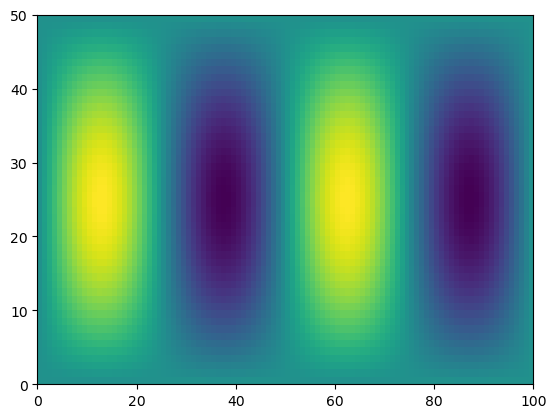

In [21]:
plt.pcolormesh(f)

### Manipulating array dimensions

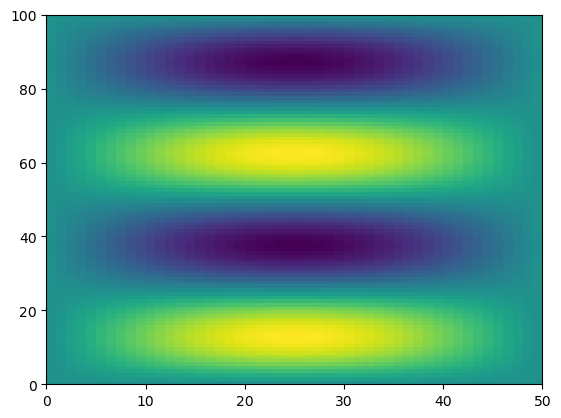

In [22]:
# transpose
plt.pcolormesh(f.T)

In [23]:
# reshape an array (wrong size)
g = np.reshape(f, (8,9))

ValueError: cannot reshape array of size 5000 into shape (8,9)

5000


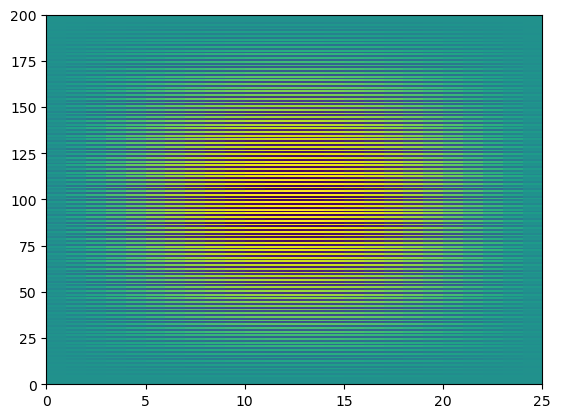

In [24]:
# reshape an array (right size) and mess it up
print(f.size)
g = np.reshape(f, (200,25))
plt.pcolormesh(g)

### Broadcasting

Broadcasting is an efficient way to multiply arrays of different sizes


<img src="http://scipy-lectures.github.io/_images/numpy_broadcasting.png" width=800>

In [25]:
# multiply f by x
print(f.shape, x.shape)
g = f * x
print(g.shape)

(50, 100) (100,)
(50, 100)


In [26]:
# multiply f by y
print(f.shape, y.shape)
h = f * y
print(h.shape)

(50, 100) (50,)


ValueError: operands could not be broadcast together with shapes (50,100) (50,) 

In [27]:
# use newaxis special syntax
h = f * y[:,np.newaxis]
print(h.shape)

(50, 100)


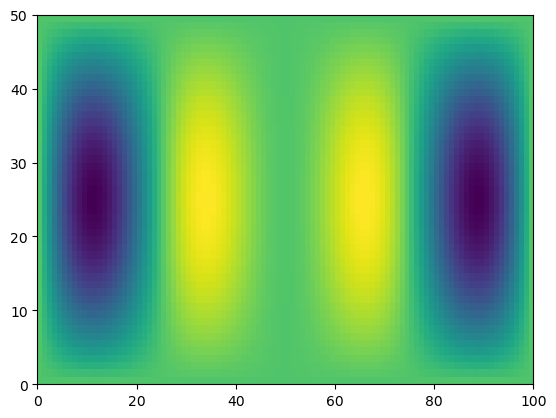

In [28]:
plt.pcolormesh(g)

### Reduction Operations

In [29]:
# sum
g.sum()

-3083.038387807155

In [30]:
# mean
g.mean()

-0.616607677561431

In [31]:
# std
g.std()

1.6402280119141424

In [32]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

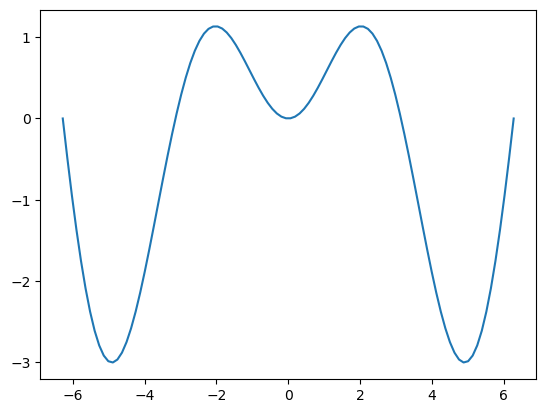

In [33]:
plt.plot(x, g_ymean)

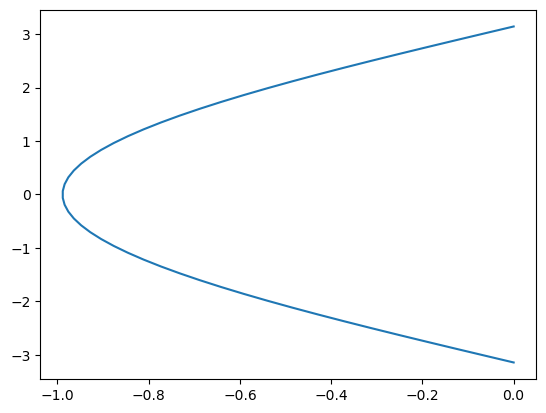

In [34]:
plt.plot(g_xmean, y)

### Reference

* https://lectures.scientific-python.org
* https://github.com/rabernat/python_teaching
* https://wy2136.github.io/python.html